# Geometry

gdsfactory provides you with some geometric functions

## Boolean
There are several common boolean-type operations available in the geometry library.  These include typical boolean operations (and/or/not/xor), offsetting (expanding/shrinking polygons), outlining, and inverting.


The ``gf.boolean()`` function can perform AND/OR/NOT/XOR operations, and will return a new geometry with the result of that operation.

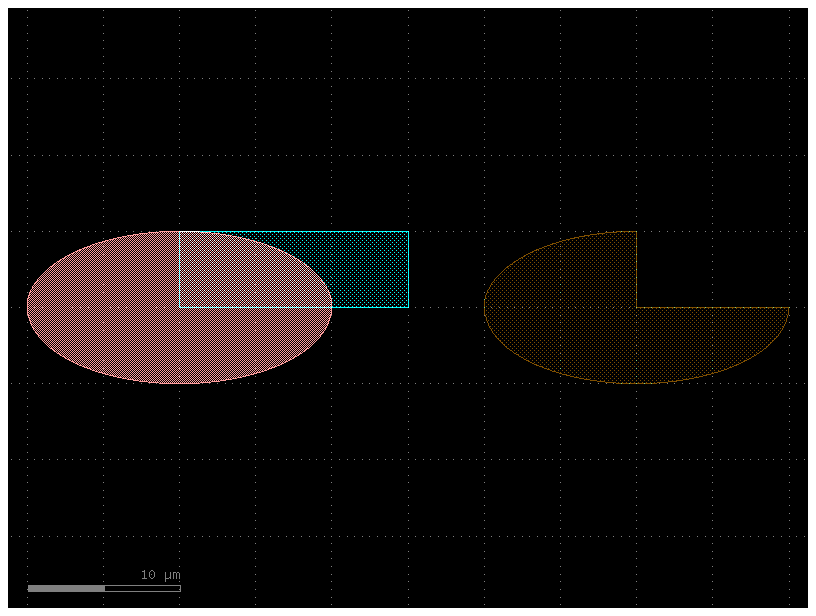

In [2]:
import gdsfactory as gf

E = gf.components.ellipse(radii=(10, 5), layer=(1, 0))
R = gf.components.rectangle(size=(15, 5), layer=(2, 0))
C = gf.boolean(A=E, B=R, operation="not", layer1=(1, 0), layer2=(2, 0), layer=(3, 0))
# Other operations include 'and', 'or', 'xor', or equivalently 'A-B', 'B-A', 'A+B'

# Plot the originals and the result
D = gf.Component()
D.add_ref(E)
D.add_ref(R)
D.add_ref(C).movex(30)
D.plot()

To learn how booleans work you can try all the different operations `not`, `and`, `or`, `xor`

In [3]:
operation = "not"
operation = "and"
operation = "or"
operation = "xor"

r1 = (8, 8)
r2 = (11, 4)
r1 = (80, 80)
r2 = (110, 40)

angle_resolution = 0.1

c1 = gf.components.ellipse(radii=r1, layer=(1, 0), angle_resolution=angle_resolution)
c2 = gf.components.ellipse(radii=r2, layer=(1, 0), angle_resolution=angle_resolution)

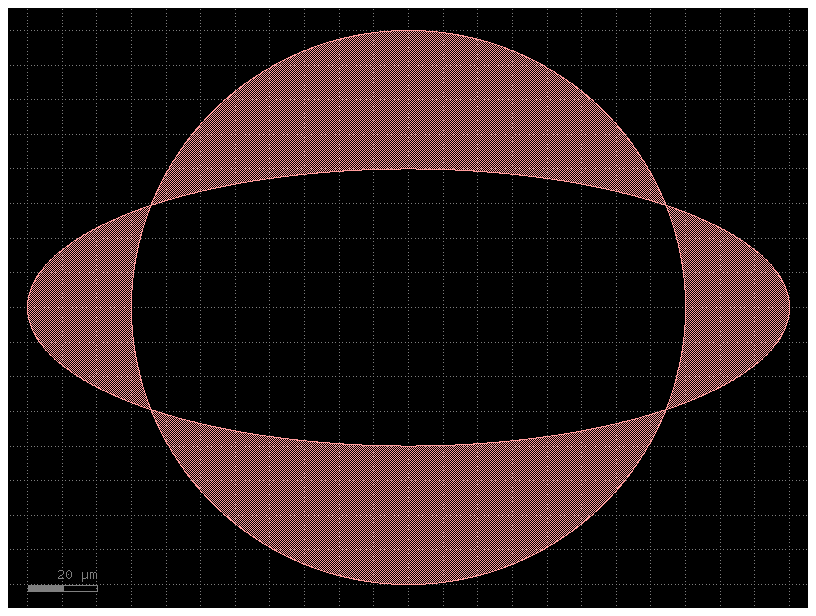

In [4]:
c4 = gf.boolean(c1, c2, operation=operation, layer=(1, 0))
c4.plot()

## Flatten

Hierarchical GDS uses references to optimize memory usage, but there are times when you may want to merge all polygons. In such cases, you can flatten the GDS to absorb all the references.

In [ ]:
import gdsfactory as gf

c = gf.Component()
e = c << gf.components.ellipse(
    radii=(10, 5), layer=(1, 0)
)  # Ellipse. equivalent to c.add_ref(gf.components.ellipse(radii=(10, 5), layer=(1, 0))
r = c << gf.components.rectangle(
    size=(15, 5), layer=(2, 0)
)  # Rectangle. equivalent to c.add_ref(gf.components.rectangle(size=(15, 5), layer=(2, 0))
print(len(c.insts))  # 2 component instances
c.flatten()
print(len(c.insts))  # 0 in the flattened component
c

## Offset

In [ ]:
import gdsfactory as gf
from gdsfactory.generic_tech import LAYER

c = gf.components.coupler_ring()
c

In [ ]:
polygons = c.get_polygons()[LAYER.WG]
polygons

In [ ]:
r = gf.kdb.Region(polygons)
r

In [ ]:
c2 = c.dup()
r = r.sized(2000)  # Note that the region is sized in DB units (1nm)
c2.add_polygon(r, layer=LAYER.SLAB90)
c2

To avoid acute angles you can run over / under (dilation+erosion).

In [ ]:
c2 = c.dup()

d = 800  # DB units
r = gf.kdb.Region(polygons)
r = r.sized(+d + 2000)
r = r.sized(-d)
c2.add_polygon(r, layer=LAYER.SLAB90)
c2

You can also apply it to a component directly.

In [ ]:
c = gf.Component()
core = gf.components.coupler_ring()

clad = core.dup()
clad.offset(layer="WG", distance=1)
clad.remap_layers({"WG": "SLAB90"})

c.add_ref(core)
c.add_ref(clad)

c

In [ ]:
c.over_under(layer="SLAB90", distance=0.2)
c

## Outline

In [ ]:
c2 = gf.Component()

d = 800
r = gf.kdb.Region(polygons)
r_sized = r.sized(+2000)

r_outline = r_sized - r
c2.add_polygon(r_outline, layer=LAYER.SLAB90)
c2

## Round corners

In [ ]:
c = gf.c.triangle()
c

In [ ]:
c2 = gf.Component()

rinner = 1000  # 	The circle radius of inner corners (in database units).
router = 1000  # 	The circle radius of outer corners (in database units).
n = 300  # 	The number of points per full circle.

# round corners for one layer only
for p in c.get_polygons()[LAYER.WG]:
    p_round = p.round_corners(rinner, router, n)
    c2.add_polygon(p_round, layer=LAYER.WG)

c2

In [ ]:
c = gf.Component()
t = c << gf.c.triangle(x=10, y=20, layer="WG")
t = c << gf.c.triangle(x=20, y=40, layer="SLAB90")

c2 = gf.Component()
rinner = 1000  # 	The circle radius of inner corners (in database units).
router = 1000  # 	The circle radius of outer corners (in database units).
n = 300  # 	The number of points per full circle.

# round corners for all layers
for layer, polygons in c.get_polygons().items():
    for p in polygons:
        p_round = p.round_corners(rinner, router, n)
        c2.add_polygon(p_round, layer=layer)

c2

## Union

In [ ]:
import gdsfactory as gf

c = gf.Component()
e0 = c << gf.components.ellipse(layer=(1, 0))
e1 = c << gf.components.ellipse(layer=(2, 0))
e2 = c << gf.components.ellipse(layer=(3, 0))
e3 = c << gf.components.ellipse(layer=(4, 0))
e4 = c << gf.components.ellipse(layer=(5, 0))
e5 = c << gf.components.ellipse(layer=(6, 0))

e1.drotate(15 * 1)
e2.drotate(15 * 2)
e3.drotate(15 * 3)
e4.drotate(15 * 4)
e5.drotate(15 * 5)

c

In [ ]:
polygons = c.get_polygons()
r = gf.kdb.Region()

for polys in polygons.values():
    r = r + gf.kdb.Region(polys)

c2 = gf.Component()
c2.add_polygon(r, layer=(1, 0))
c2

## Importing GDS files

`gf.import_gds()` allows you to easily import external GDSII files.  It imports a single cell from the external GDS file and converts it into a gdsfactory component.

In [ ]:
D = gf.components.ellipse()
D.write_gds("myoutput.gds")
D2 = gf.import_gds(gdspath="myoutput.gds")
D2.plot()

## Copying and extracting geometry

In [ ]:
E = gf.Component()
E.add_ref(gf.components.ellipse(layer=(1, 0)))
D = E.extract(layers=[(1, 0)])
D.plot()

In [ ]:
import gdsfactory as gf

X = gf.components.ellipse(layer=(2, 0))
c = X.copy()
c.plot()

In [ ]:
c = gf.c.straight()
c = c.copy()
c.copy_layers(layer_map=dict(WG=(2, 0)), recursive=False) # type: ignore
c

## Import Images into GDS

You can import your logo into GDS using the conversion from numpy arrays.

In [ ]:
import gdsfactory as gf
from gdsfactory.config import PATH
from gdsfactory.read.from_np import from_image

c = from_image(
    PATH.module / "samples" / "images" / "logo.png", nm_per_pixel=500, invert=False
)
c.plot()

In [ ]:
c = from_image(
    PATH.module / "samples" / "images" / "logo.png", nm_per_pixel=500, invert=True
)
c.plot()

## Dummy Fill / Tiling

To keep constant density in some layers you can add dummy fill shapes.

For big layouts you should use tiling processor.

In [ ]:
import kfactory as kf
from kfactory.utils.fill import fill_tiled

import gdsfactory as gf

c = kf.DKCell("ToFill")
c.shapes(kf.kcl.layer(1, 0)).insert(
    kf.kdb.DPolygon.ellipse(kf.kdb.DBox(5000, 3000), 512)
)
c.shapes(kf.kcl.layer(10, 0)).insert(
    kf.kdb.DPolygon(
        [kf.kdb.DPoint(0, 0), kf.kdb.DPoint(5000, 0), kf.kdb.DPoint(5000, 3000)]
    )
)

fc = kf.DKCell()
fc.shapes(fc.kcl.layer(2, 0)).insert(kf.kdb.DBox(20, 40))
fc.shapes(fc.kcl.layer(3, 0)).insert(kf.kdb.DBox(30, 15))

# fill.fill_tiled(c, fc, [(kf.kcl.layer(1,0), 0)], exclude_layers = [(kf.kcl.layer(10,0), 100), (kf.kcl.layer(2,0), 0), (kf.kcl.layer(3,0),0)], x_space=5, y_space=5)
fill_tiled(
    c,
    fc,
    [(kf.kdb.LayerInfo(1, 0), 0)],
    exclude_layers=[
        (kf.kdb.LayerInfo(10, 0), 100),
        (kf.kdb.LayerInfo(2, 0), 0),
        (kf.kdb.LayerInfo(3, 0), 0),
    ],
    x_space=5,
    y_space=5,
)

gdspath = "mzi_fill.gds"
c.write(gdspath)
c = gf.import_gds(gdspath, cellname="ToFill")
c.plot()